# EDA
In this notebook we analyse the dataset that we have now normalized in the previous Data Processing notebook. 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('df_cleaned.csv')
df_cancel = pd.read_csv('df_cancel.csv')

Firstly let's create a heatmap between the delay factors.

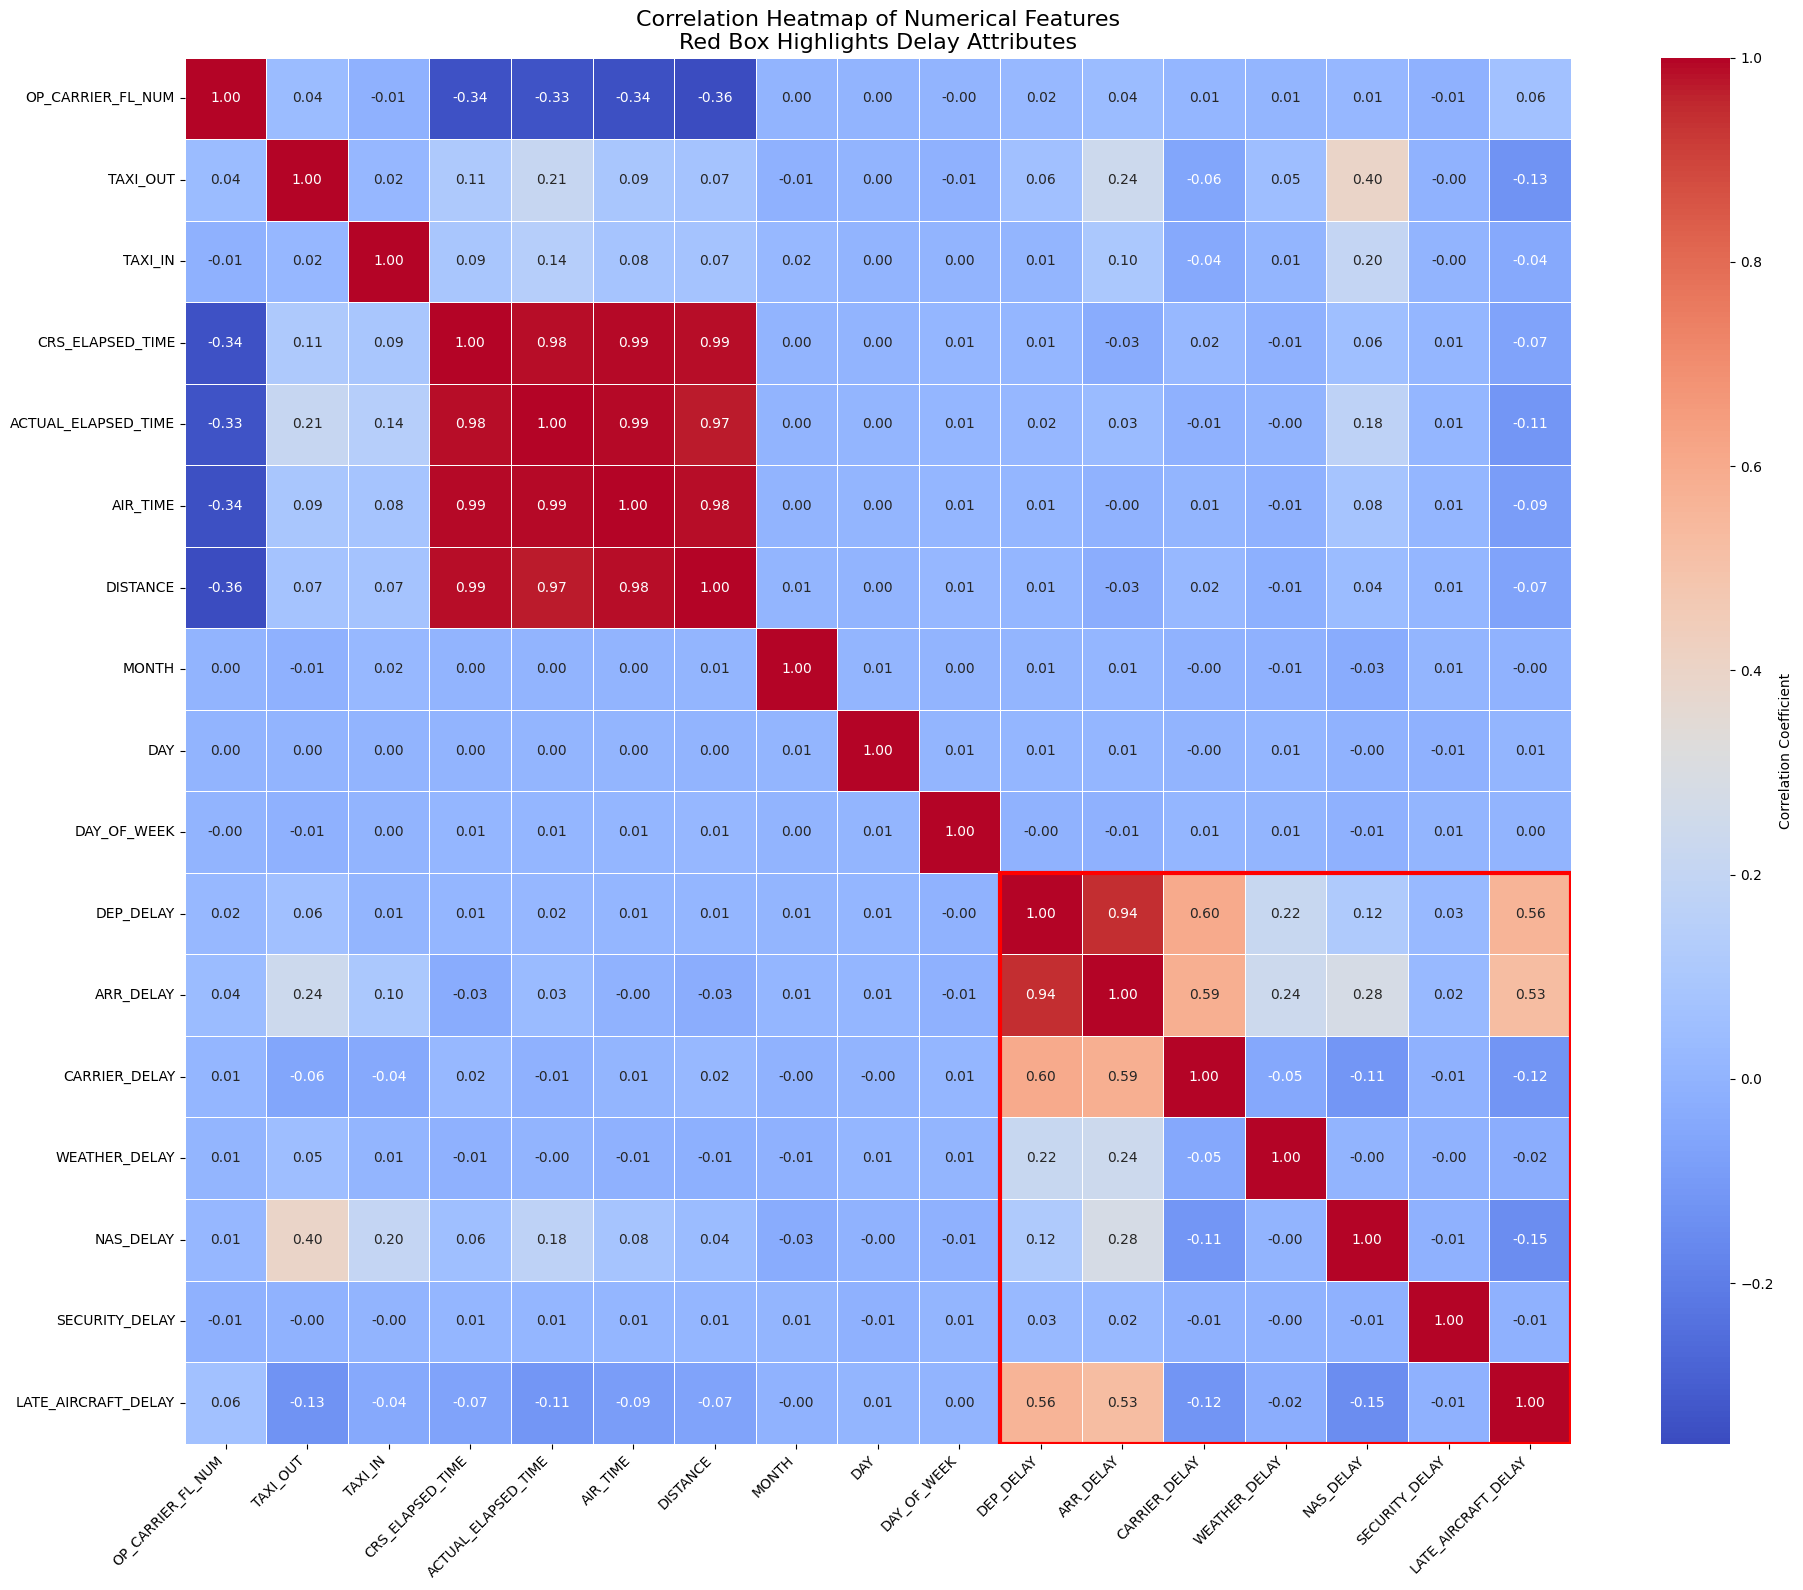


Detailed Delay Attributes Correlation:
                     DEP_DELAY  ARR_DELAY  CARRIER_DELAY  WEATHER_DELAY  \
DEP_DELAY             1.000000   0.943565       0.599600       0.216644   
ARR_DELAY             0.943565   1.000000       0.586183       0.237862   
CARRIER_DELAY         0.599600   0.586183       1.000000      -0.045391   
WEATHER_DELAY         0.216644   0.237862      -0.045391       1.000000   
NAS_DELAY             0.118713   0.280010      -0.114209      -0.000751   
SECURITY_DELAY        0.025990   0.024718      -0.010288      -0.004008   
LATE_AIRCRAFT_DELAY   0.564872   0.528156      -0.121655      -0.023464   

                     NAS_DELAY  SECURITY_DELAY  LATE_AIRCRAFT_DELAY  
DEP_DELAY             0.118713        0.025990             0.564872  
ARR_DELAY             0.280010        0.024718             0.528156  
CARRIER_DELAY        -0.114209       -0.010288            -0.121655  
WEATHER_DELAY        -0.000751       -0.004008            -0.023464  
NAS_DELAY

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define delay-related columns
delay_columns = ['DEP_DELAY', 'ARR_DELAY', 'CARRIER_DELAY', 
                 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 
                 'LATE_AIRCRAFT_DELAY']

# Select all numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

numerical_cols = numerical_cols.drop('YEAR', errors='ignore')
# Separate non-delay columns
non_delay_columns = [col for col in numerical_cols if col not in delay_columns]

# Reorder columns to group delay attributes together
reordered_columns = non_delay_columns + delay_columns

# Compute correlation matrix with reordered columns
corr_matrix = df[reordered_columns].corr()

# Create the plot
plt.figure(figsize=(20, 16))

# Create the heatmap
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm', 
            fmt=".2f", 
            linewidths=0.5,
            square=True,
            cbar_kws={'label': 'Correlation Coefficient'})

# Find the start index of delay columns
delay_start_index = len(non_delay_columns)

# Draw a rectangle around delay columns
plt.gca().add_patch(plt.Rectangle(
    (delay_start_index, delay_start_index), 
    len(delay_columns), 
    len(delay_columns), 
    fill=False, 
    edgecolor='red', 
    lw=3
))

plt.title('Correlation Heatmap of Numerical Features\nRed Box Highlights Delay Attributes', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


delay_corr = corr_matrix.loc[delay_columns, delay_columns]
# Print out detailed delay correlations
print("\nDetailed Delay Attributes Correlation:")
print(delay_corr)

# Identify strongest correlations among delay attributes
def find_top_correlations(corr_matrix, n=5):
    # Create a mask to avoid duplicates and self-correlations
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
    # Flatten the correlation matrix
    corr_flat = corr_matrix.where(~mask).stack().reset_index()
    corr_flat.columns = ['Feature 1', 'Feature 2', 'Correlation']
    
    # Sort by absolute correlation value
    top_correlations = corr_flat.reindex(
        corr_flat['Correlation'].abs().sort_values(ascending=False).index
    )
    
    return top_correlations.head(n)

print("\nTop 5 Correlations among Delay Attributes:")
print(find_top_correlations(delay_corr))

Looking at the heatmap we can see the correlations between the delay factors.
- DEP_DELAY and ARR_DELAY have high correlation. This is expected, as delayed departure results in a delayed arrival.
- DEP_DELAY and CARRIER_DELAY have a medium correlation, which means delays caused by the airline are somewhat related to departure delays.
- WEATHER_DELAY has low correlation to other factors, which means weather isn't a big cause of delays.
- LATE_AIRCRAFT_DELAY has medium correlation to DEP_DELAY and ARR_DELAY, which means aircraft delays contribute significantly to delays in departures and arrivals.
- NAS_DELAY has low correlations to other factors, which means it doesn't affect delays that much.
- Correlation with SECURITY_DELAY is minimal, as is the number of delays caused by security reasons.


Now let's create histograms for some simple delay analysis, for this we will currently use sampled_data (around 10% of the original), because the data is huge. (todo: try to use full data)

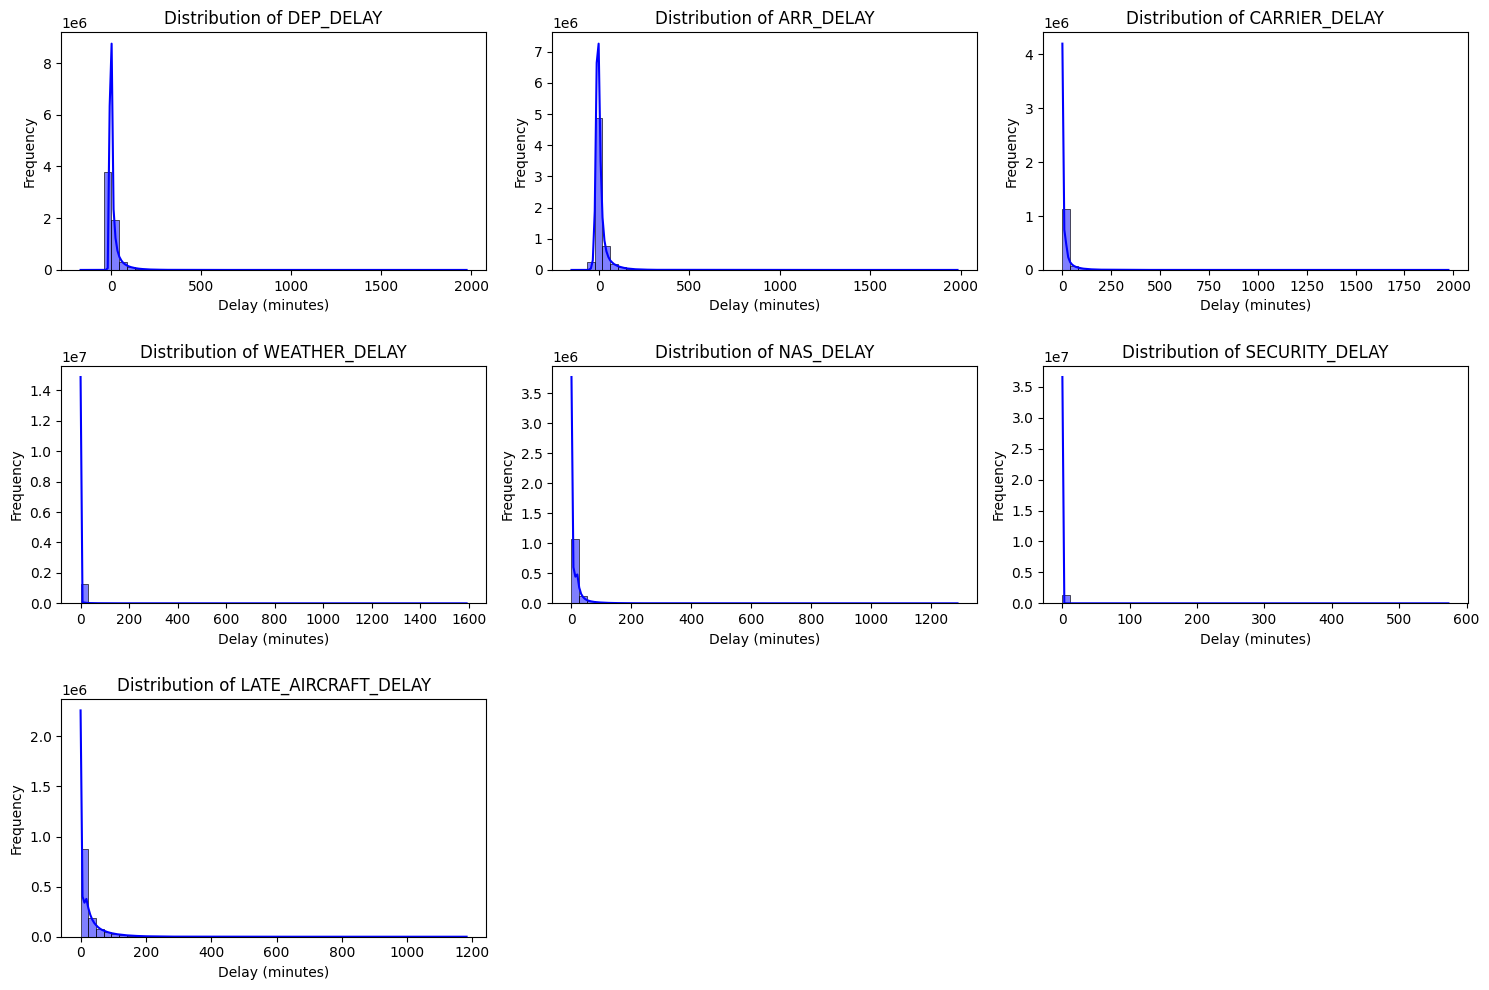

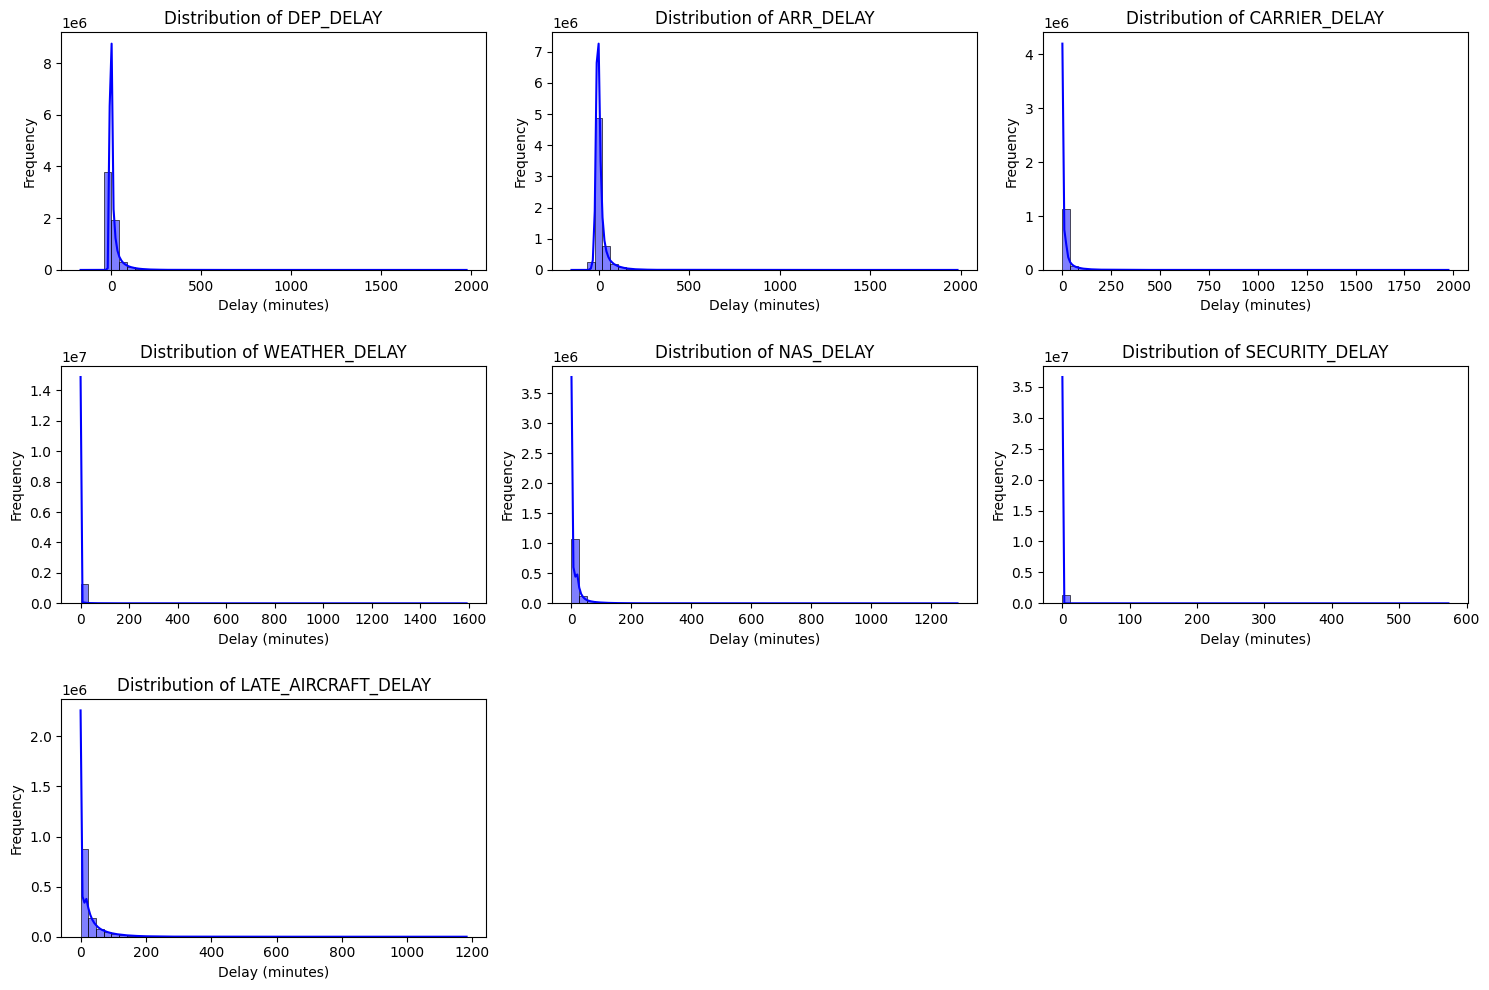

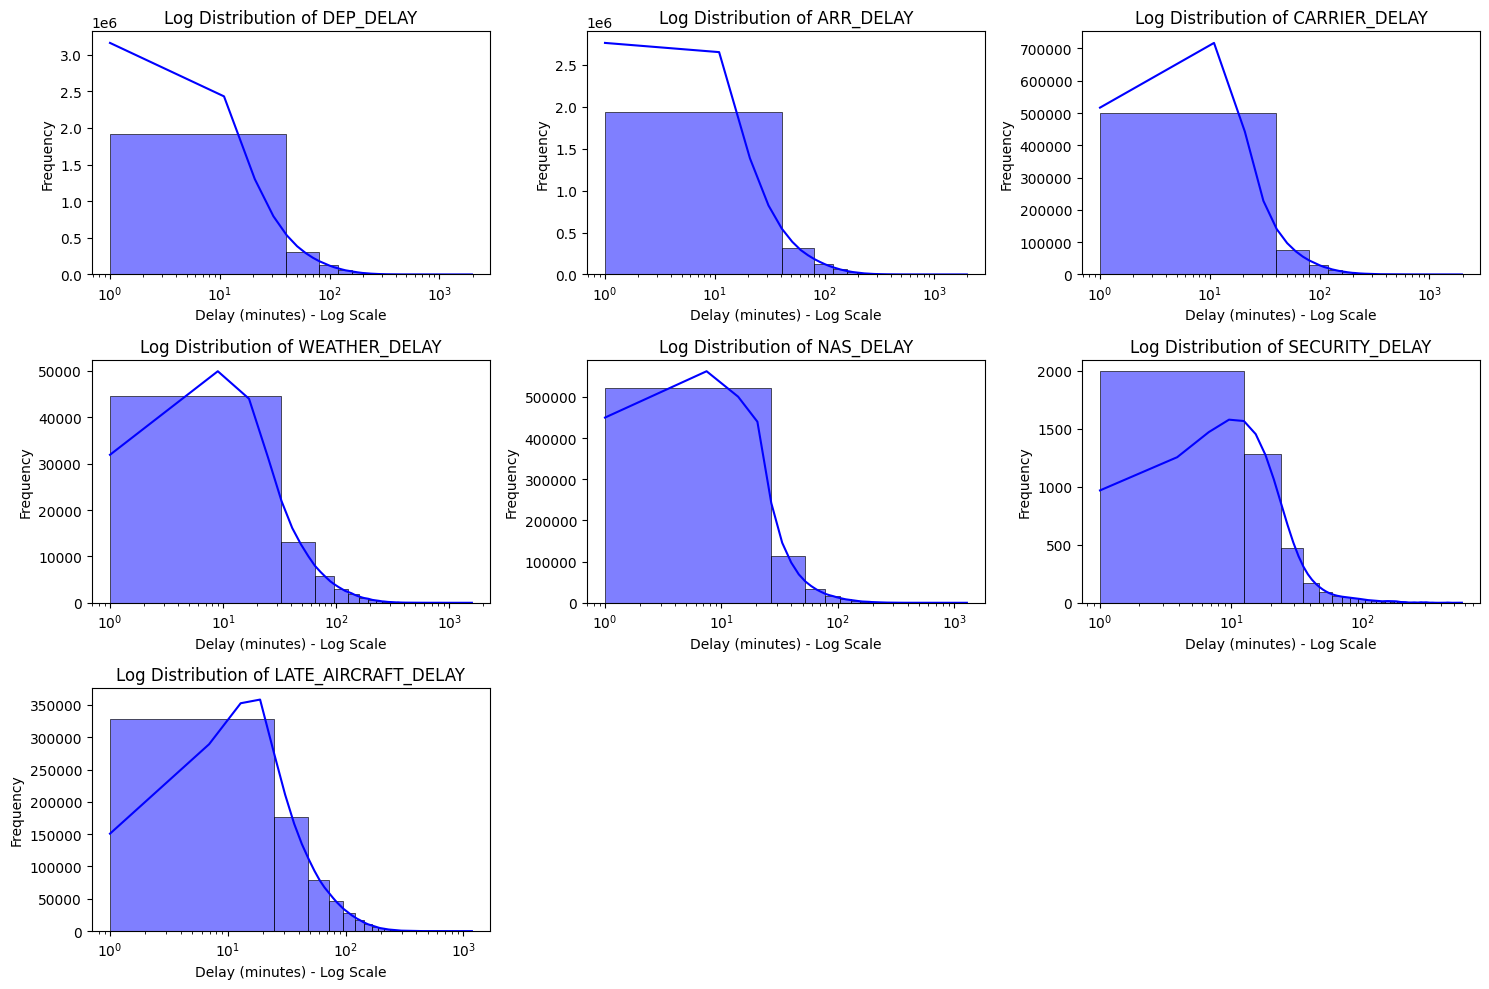

                          mean  median        std     max    min  \
DEP_DELAY             9.684819    -1.0  35.567039  1975.0 -171.0   
ARR_DELAY             6.010872    -3.0  38.052002  1983.0 -153.0   
CARRIER_DELAY        16.652706     1.0  43.581631  1975.0    0.0   
WEATHER_DELAY         2.343187     0.0  17.025016  1591.0    0.0   
NAS_DELAY            13.729758     3.0  27.654010  1287.0    0.0   
SECURITY_DELAY        0.081661     0.0   2.627572   573.0    0.0   
LATE_AIRCRAFT_DELAY  23.868734     7.0  41.037532  1182.0    0.0   

                     zero_percentage  
DEP_DELAY                   5.632969  
ARR_DELAY                   2.414659  
CARRIER_DELAY              10.070567  
WEATHER_DELAY              19.141295  
NAS_DELAY                   8.967171  
SECURITY_DELAY             20.208713  
LATE_AIRCRAFT_DELAY         8.985959  


In [5]:


plt.figure(figsize=(15, 10))

# Calculate the number of rows and columns
num_cols = 3
num_rows = (len(delay_columns) + num_cols - 1) // num_cols

for i, col in enumerate(delay_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df[col], bins=50, kde=True, color='blue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Delay (minutes)')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Alternative approach with more flexibility
def plot_delay_distributions(data, columns, figsize=(15, 10), bins=50):
    num_cols = 3
    num_rows = (len(columns) + num_cols - 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()  # Flatten the array of axes for easy indexing

    for i, col in enumerate(columns):
        sns.histplot(data[col], bins=bins, kde=True, color='blue', edgecolor='black', ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel('Delay (minutes)')
        axes[i].set_ylabel('Frequency')

    # Remove any unused subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Use the function
plot_delay_distributions(df, delay_columns)

# Optional: Log scale version
def plot_delay_distributions_log(data, columns, figsize=(15, 10), bins=50):
    num_cols = 3
    num_rows = (len(columns) + num_cols - 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()  # Flatten the array of axes for easy indexing

    for i, col in enumerate(columns):
        # Filter out zero and negative values for log scale
        positive_data = data[data[col] > 0][col]
        
        sns.histplot(positive_data, bins=bins, kde=True, color='blue', edgecolor='black', ax=axes[i])
        axes[i].set_xscale('log')
        axes[i].set_title(f'Log Distribution of {col}')
        axes[i].set_xlabel('Delay (minutes) - Log Scale')
        axes[i].set_ylabel('Frequency')

    # Remove any unused subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Use the log scale version
plot_delay_distributions_log(df, delay_columns)

# Additional statistical summary
def delay_distribution_summary(data, columns):
    summary = {}
    for col in columns:
        summary[col] = {
            'mean': data[col].mean(),
            'median': data[col].median(),
            'std': data[col].std(),
            'max': data[col].max(),
            'min': data[col].min(),
            'zero_percentage': (data[col] == 0).mean() * 100
        }
    
    return pd.DataFrame.from_dict(summary, orient='index')

# Print summary
print(delay_distribution_summary(df, delay_columns))

Histograms show distributions of various types of delays, with most of them being around the lower end of the scale, which means most of the delays are somewhat short, but some delays are absurdly long, which seems odd.

Now let's get into delay factors breakdown by categorical variables.

Starting off with carrier delays.

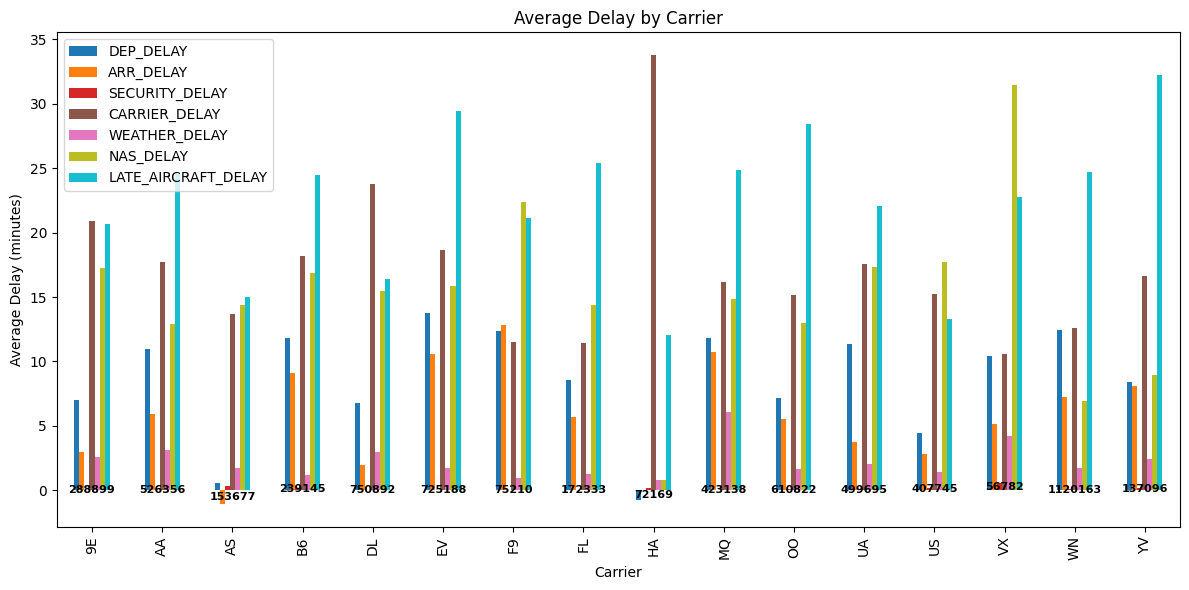

In [ ]:
# Calculate mean delays

carrier_delay = df.groupby('OP_CARRIER')[['DEP_DELAY', 'ARR_DELAY', 'SECURITY_DELAY' ,  'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'LATE_AIRCRAFT_DELAY']].mean()

# Calculate counts for each carrier
carrier_counts = df.groupby('OP_CARRIER').size()

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the bars

carrier_delay.plot(kind='bar', ax=ax,colormap='tab10')




for i, carrier in enumerate(carrier_delay.index):
    # Get the height of the first bar in the group
    bar_height = carrier_delay.iloc[i].min()
    
    plt.text(i, bar_height/2, f'{carrier_counts[carrier]}', 
             horizontalalignment='center', 
             verticalalignment='center',
             color='black',  # White text for visibility
             fontweight='bold',
             fontsize=8)

plt.title('Average Delay by Carrier')
plt.xlabel('Carrier')
plt.ylabel('Average Delay (minutes)')
plt.tight_layout()
plt.show()

We can see that across the board, the biggest causers of delays are still the aircraft delay and delays caused by the carrier. The least relevant causer of delay is by far security reasons. Delays caused by the weather or by meteorogical institutes (NAS) are also rather sizeable.

Next, let's look at the average departure delay by the top 30 and bottom 30 airports. We aren't using all of the airports, because there are way too many of them.

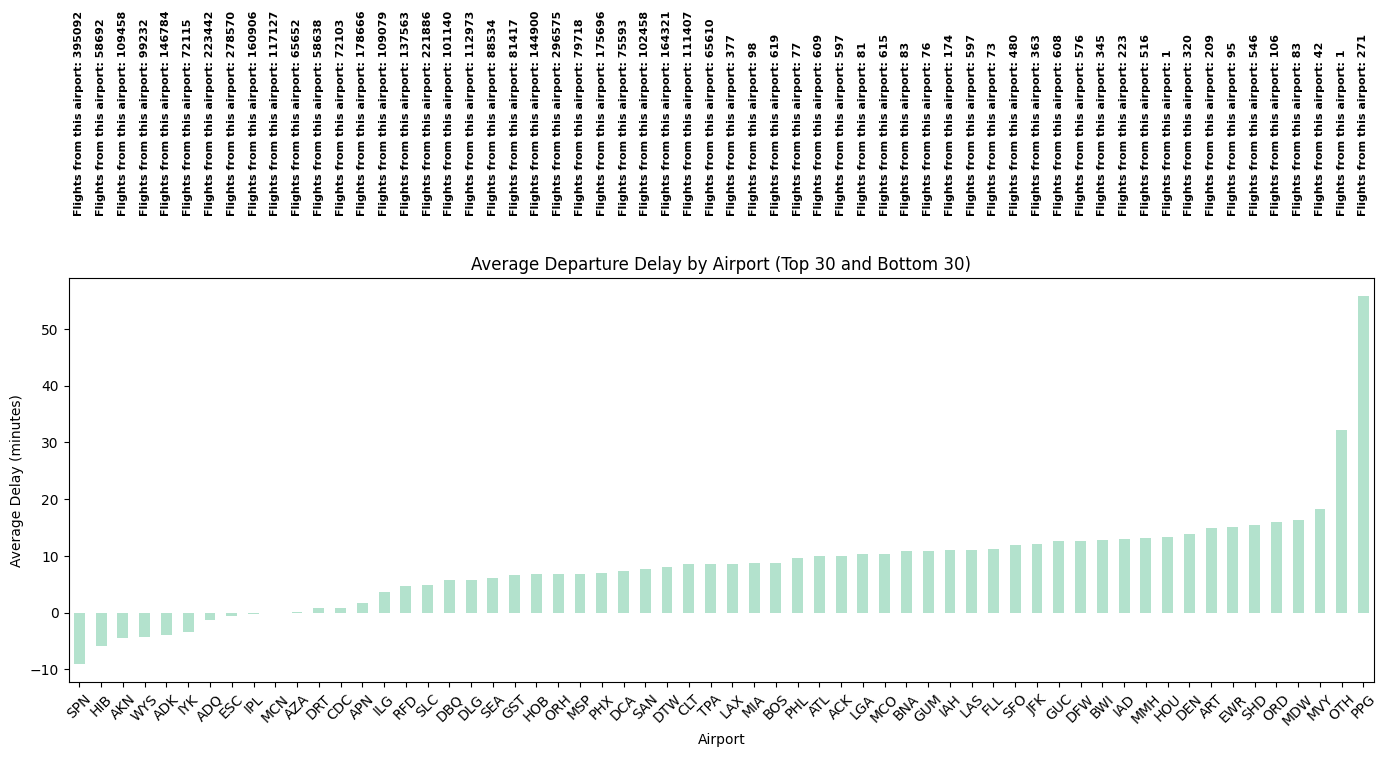

In [ ]:
airport_flight_counts = df['ORIGIN'].value_counts()

top_30_airports = airport_flight_counts.head(30).index
bottom_30_airports = airport_flight_counts.tail(30).index
top_30_data = df[df['ORIGIN'].isin(top_30_airports)]
bottom_30_data = df[df['ORIGIN'].isin(bottom_30_airports)]
top_30_delay = top_30_data.groupby('ORIGIN')['DEP_DELAY'].mean()
bottom_30_delay = bottom_30_data.groupby('ORIGIN')['DEP_DELAY'].mean()

airport_delay = pd.concat([top_30_delay, bottom_30_delay])

# Plot the average departure delays for top 30 and bottom 30 airports
plt.figure(figsize=(14, 8))
bars = airport_delay.sort_values().plot(kind='bar', colormap='Pastel2')

# Add counts inside the bars
for i, airport in enumerate(airport_delay.index):
    # Get the height of the bar
    bar_height = airport_delay.iloc[i]
    

    # Get the flight count for this airport
    count = airport_flight_counts[airport]
        
    # Adjust position based on bar height
    #vertical_position = max(bar_height * 0.1, 0.5)  # Ensure minimum visibility
    vertical_position = 70
    plt.text(i, vertical_position, f'Total flights from this airport: {count}', 
                horizontalalignment='center', 
                verticalalignment='bottom',
                rotation=90,  # Rotate text vertically
                color='black',  # White text for visibility
                fontweight='bold',
                fontsize=8)

plt.title('Average Departure Delay by Airport (Top 30 and Bottom 30)')
plt.xlabel('Airport')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Looking at the plot, we can see that the largest delays are present in the airports with less departures. The average delay is quite consistent for airports that have frequent departures.

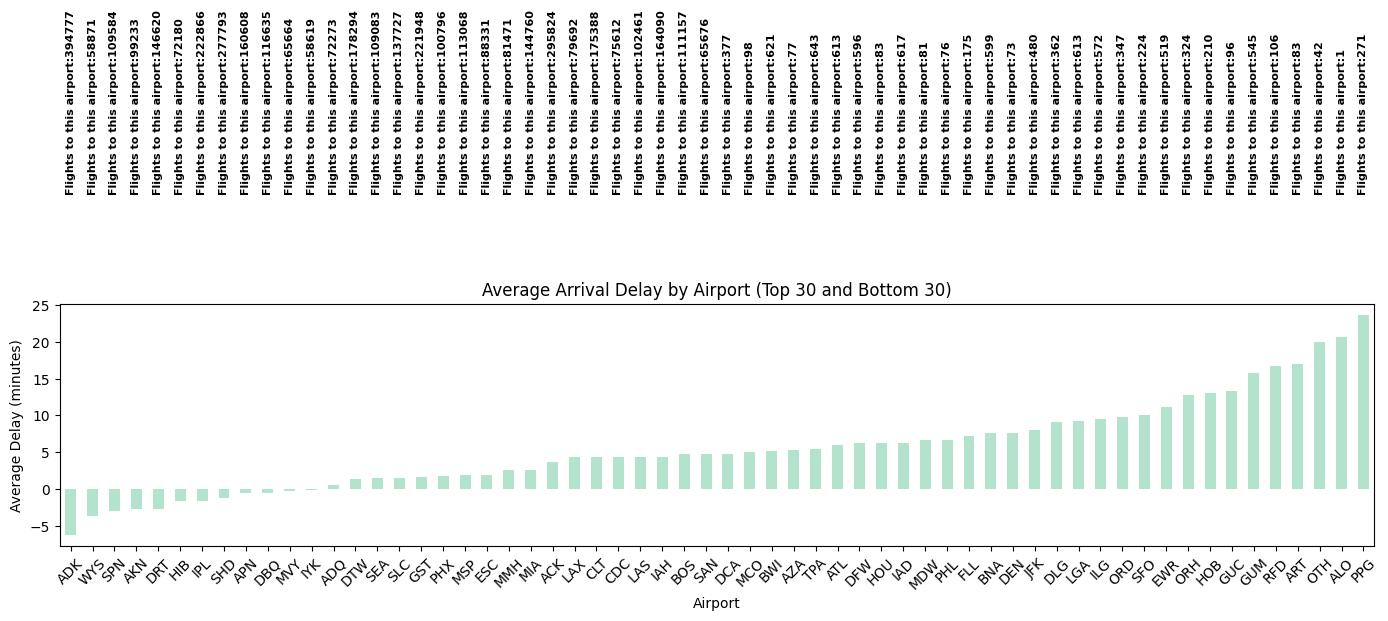

In [ ]:
airport_flight_counts = df['DEST'].value_counts()

top_30_airports = airport_flight_counts.head(30).index
bottom_30_airports = airport_flight_counts.tail(30).index
top_30_data = df[df['DEST'].isin(top_30_airports)]
bottom_30_data = df[df['DEST'].isin(bottom_30_airports)]
top_30_delay = top_30_data.groupby('DEST')['ARR_DELAY'].mean()
bottom_30_delay = bottom_30_data.groupby('DEST')['ARR_DELAY'].mean()

airport_delay = pd.concat([top_30_delay, bottom_30_delay])

# Plot the average departure delays for top 30 and bottom 30 airports
plt.figure(figsize=(14, 8))

bars = airport_delay.sort_values().plot(kind='bar', colormap='Pastel2')
# Add counts inside the bars
for i, airport in enumerate(airport_delay.index):
    # Get the height of the bar
    bar_height = airport_delay.iloc[i]
    
    # Get the count for this airport
    count = airport_flight_counts[airport]
    
    # Adjust position based on bar height
    #vertical_position = max(bar_height * 0.1, 0.5)  # Ensure minimum visibility

    vertical_position = 40
    
    plt.text(i, vertical_position, f'Total flights to this airport:{count}', 
             horizontalalignment='center', 
             verticalalignment='bottom',
             rotation=90,  # Rotate text vertically
             color='black',  # White text for visibility
             fontweight='bold',
             fontsize=8)

plt.title('Average Arrival Delay by Airport (Top 30 and Bottom 30)')
plt.xlabel('Airport')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

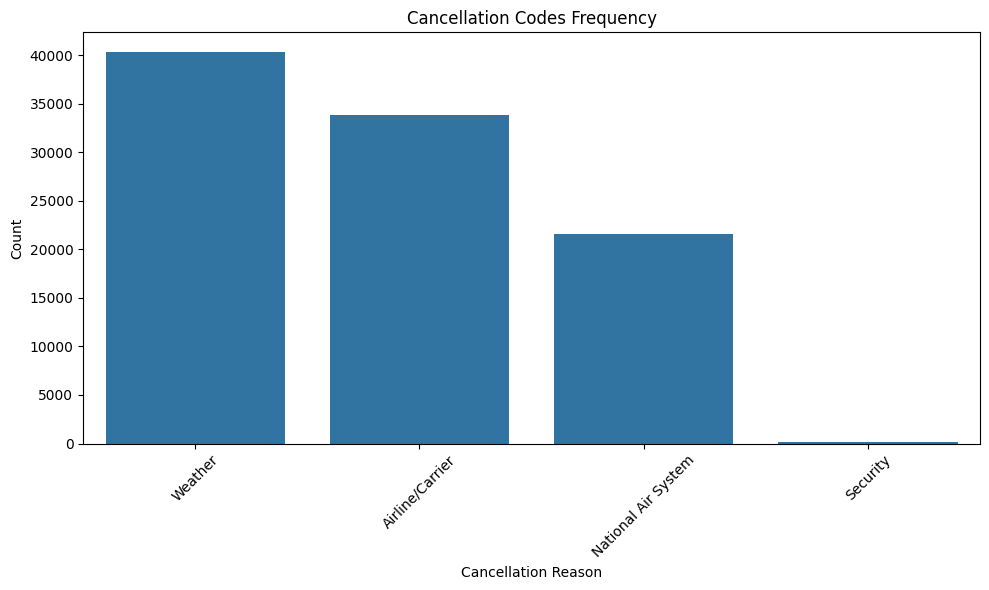

In [ ]:
'''
# Mapping dictionary for cancellation codes
cancellation_map = {
    'A': 'Airline/Carrier',
    'B': 'Weather',
    'C': 'National Air System',
    'D': 'Security'
}

# Count the occurrences of each cancellation code
cancellation_counts = df_cancel['CANCELLATION_CODE'].value_counts()

# Create a bar plot with mapped labels
plt.figure(figsize=(10, 6))
sns.barplot(
    x=cancellation_counts.index.map(cancellation_map),
    y=cancellation_counts.values
)
plt.title('Cancellation Codes Frequency')
plt.xlabel('Cancellation Reason')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
'''

### Delay by month

Now let's take a look at average departure delay per month.

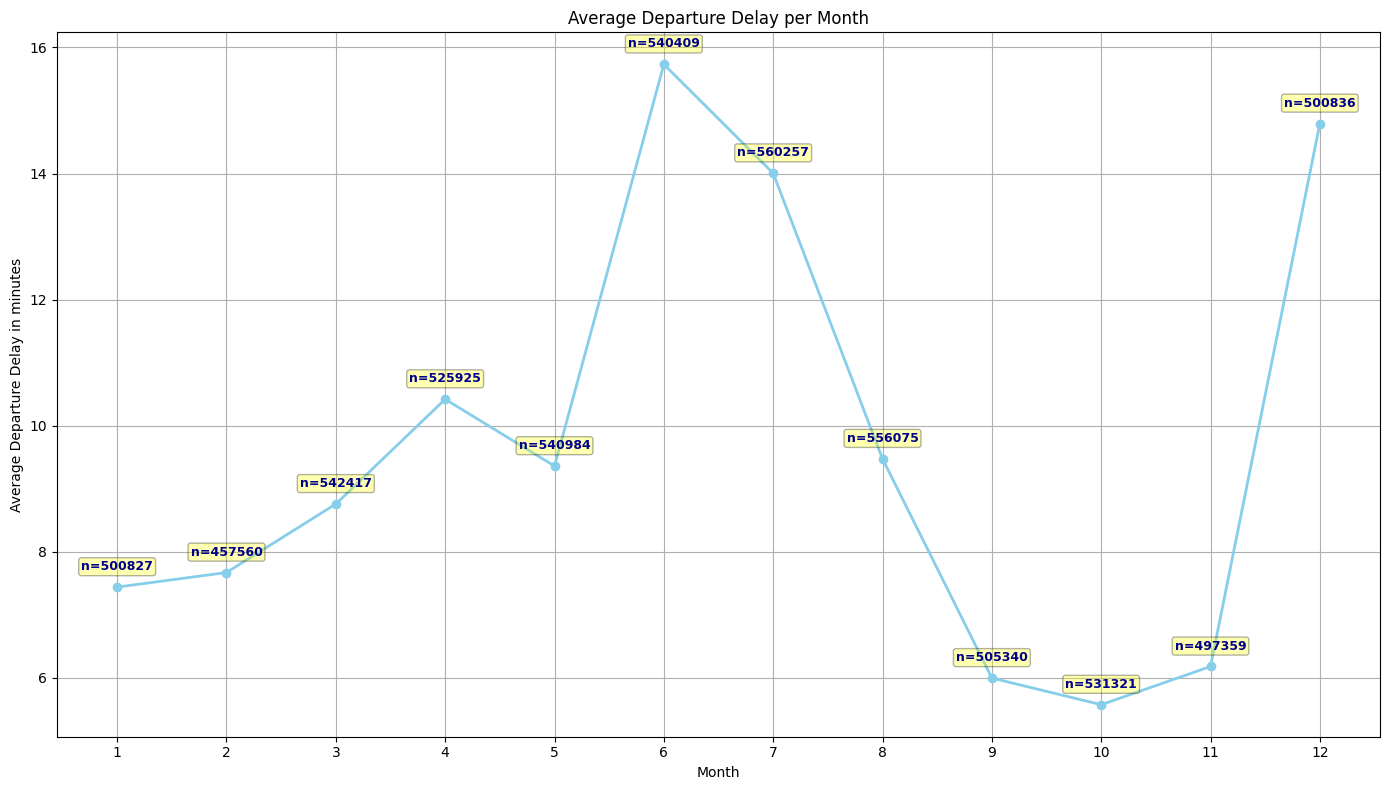

In [57]:
# Extract Year and Month from FL_DATE
#df['FL_DATE'] = pd.to_datetime(df['FL_DATE'], errors='coerce')
#df.loc[:, 'Year_Month'] = df['FL_DATE'].dt.to_period('M')

# Group by Year-Month and calculate the average departure delay
#monthly_delay = df.groupby('Year_Month')['DEP_DELAY'].mean()
# Calculate monthly delay
monthly_delay = df.groupby(df['MONTH'])['DEP_DELAY'].mean()

# Calculate monthly flight counts
monthly_counts = df.groupby(df['MONTH']).size()

# Plot
plt.figure(figsize=(14, 8))
line = monthly_delay.plot(kind='line', marker='o', color='skyblue', linestyle='-', linewidth=2)

# Add flight counts near each point
for month, delay in monthly_delay.items():
    count = monthly_counts[month]
    plt.annotate(f'n={count}', 
                 xy=(month, delay), 
                 xytext=(0, 10),  # 10 points vertical offset
                 textcoords='offset points',
                 ha='center', 
                 va='bottom',
                 fontweight='bold',
                 color='darkblue',
                 fontsize=9,
                 bbox=dict(boxstyle='round,pad=0.2', 
                           fc='yellow', 
                           alpha=0.3))

plt.title('Average Departure Delay per Month')
plt.xlabel('Month')
plt.ylabel('Average Departure Delay in minutes')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.grid(True)
plt.tight_layout()
plt.show()


Taking a look at the plot, we can see that the months leading up to the summer months cause bigger delay and in December the delay also spikes up. This is somewhat expected because a lot of travelling takes place in summer and December has famous holidays in which people travel to be closer to their family members (Christmas, New Year's Eve).


Now let's take a look at average arrival delay per month.

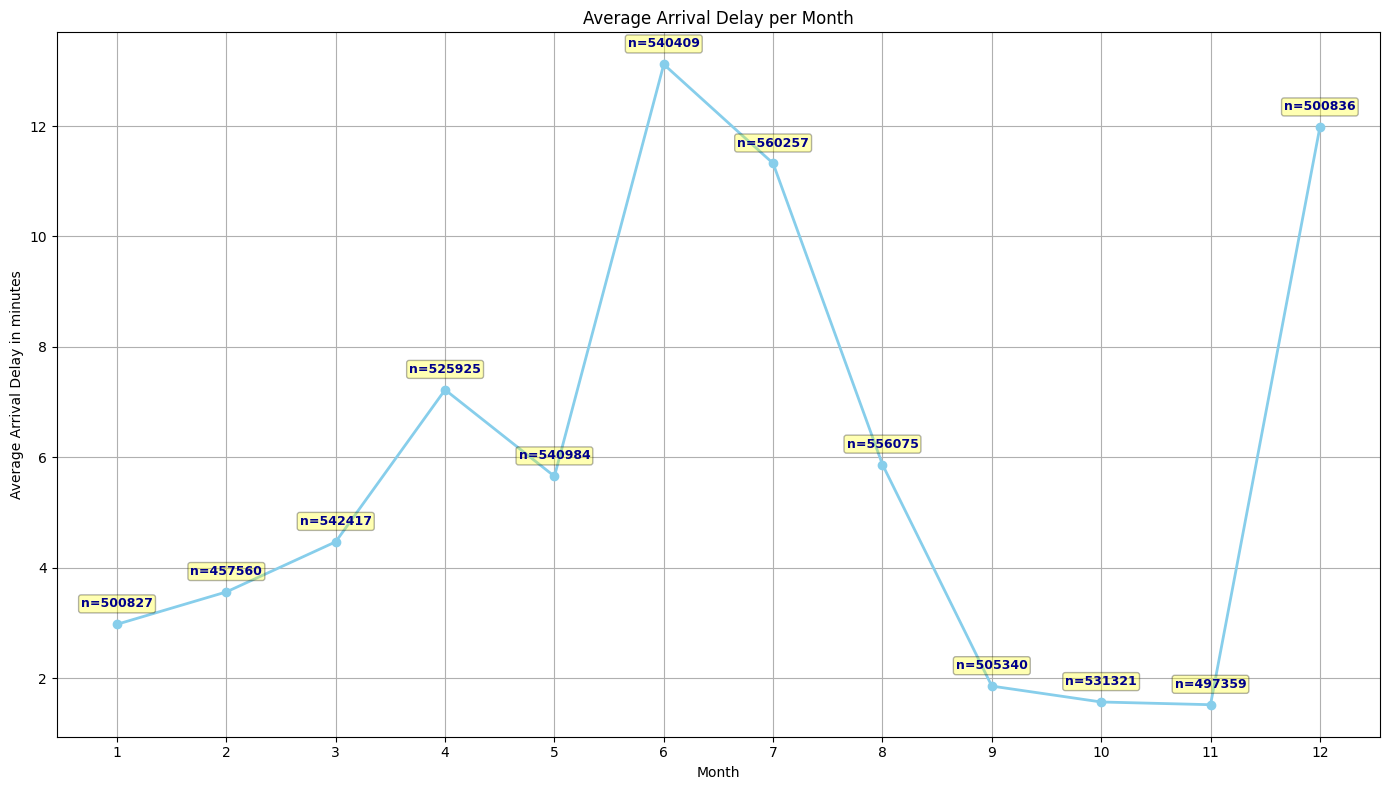

In [60]:
# Extract Year and Month from FL_DATE
#df['FL_DATE'] = pd.to_datetime(df['FL_DATE'], errors='coerce')
#df.loc[:, 'Year_Month'] = df['FL_DATE'].dt.to_period('M')

# Group by Year-Month and calculate the average arrival delay
#monthly_delay = df.groupby('Year_Month')['ARR_DELAY'].mean()
# Calculate monthly delay
monthly_delay = df.groupby(df['MONTH'])['ARR_DELAY'].mean()

# Calculate monthly flight counts
monthly_counts = df.groupby(df['MONTH']).size()

# Plot
plt.figure(figsize=(14, 8))
line = monthly_delay.plot(kind='line', marker='o', color='skyblue', linestyle='-', linewidth=2)

# Add flight counts near each point
for month, delay in monthly_delay.items():
    count = monthly_counts[month]
    plt.annotate(f'n={count}', 
                 xy=(month, delay), 
                 xytext=(0, 10),  # 10 points vertical offset
                 textcoords='offset points',
                 ha='center', 
                 va='bottom',
                 fontweight='bold',
                 color='darkblue',
                 fontsize=9,
                 bbox=dict(boxstyle='round,pad=0.2', 
                           fc='yellow', 
                           alpha=0.3))

plt.title('Average Arrival Delay per Month')
plt.xlabel('Month')
plt.ylabel('Average Arrival Delay in minutes')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.grid(True)
plt.tight_layout()
plt.show()


Here we can see similar trends to average departures delays. However, arrival delay is smaller than departure delay based on those graph comparisons.

### Delays by weekday

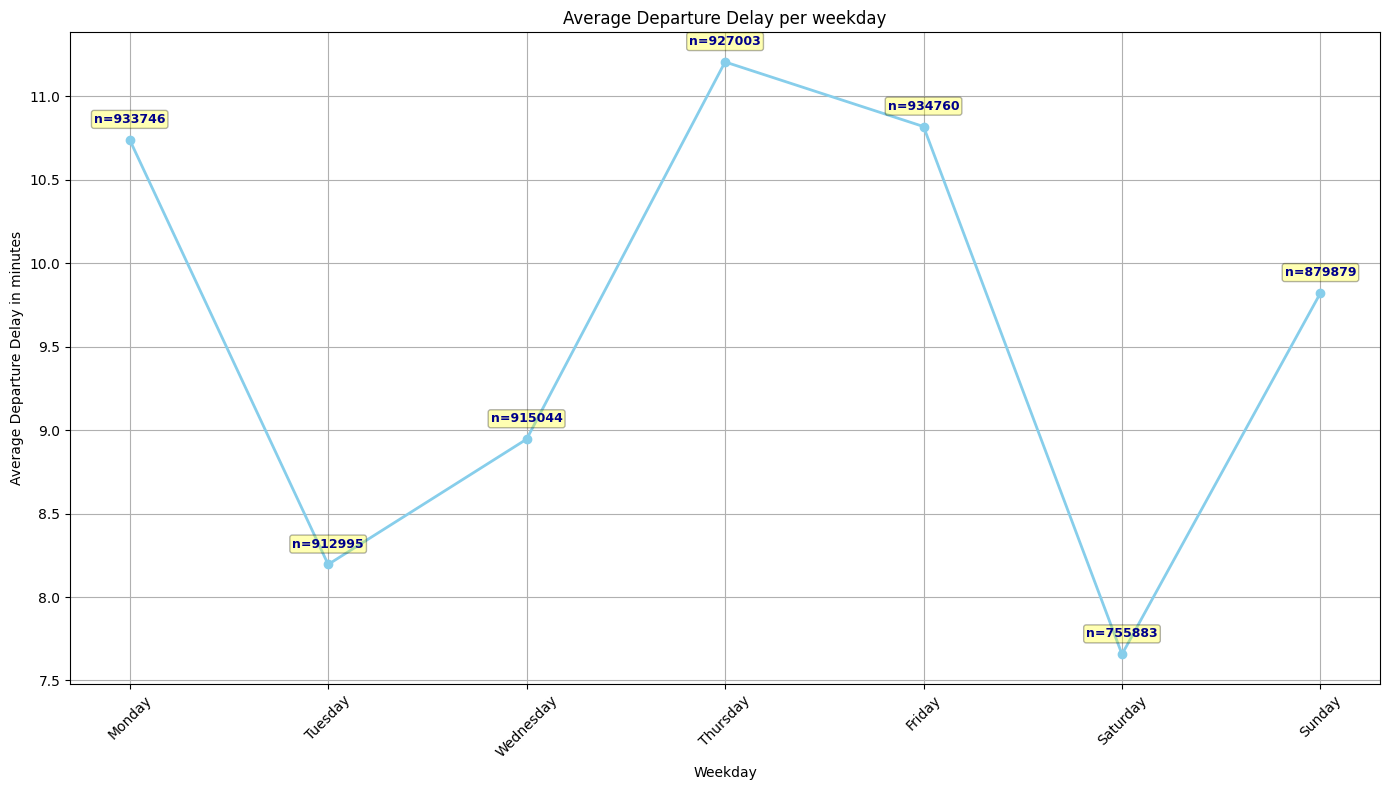

In [61]:
# Weekday mapping
week_map = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

weekday_delay = df.groupby(df['DAY_OF_WEEK'])['DEP_DELAY'].mean()

# Calculate monthly flight counts
weekday_counts = df.groupby(df['DAY_OF_WEEK']).size()

# Plot
plt.figure(figsize=(14, 8))
line = weekday_delay.plot(kind='line', marker='o', color='skyblue', linestyle='-', linewidth=2)

# Add flight counts near each point
for weekday, delay in weekday_delay.items():
    count = weekday_counts[weekday]
    plt.annotate(f'n={count}', 
                 xy=(weekday, delay), 
                 xytext=(0, 10),  # 10 points vertical offset
                 textcoords='offset points',
                 ha='center', 
                 va='bottom',
                 fontweight='bold',
                 color='darkblue',
                 fontsize=9,
                 bbox=dict(boxstyle='round,pad=0.2', 
                           fc='yellow', 
                           alpha=0.3))

plt.title('Average Departure Delay per weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Departure Delay in minutes')

plt.xticks(list(week_map.keys()), [week_map[key] for key in week_map], rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()


From the graph we can surmize that the least common day for flights is Saturday and that the average departure delay varies from 7.7 to 11.3 minutes. The longest departure delays are on Thursdays and the shortest delays are on Saturdays.

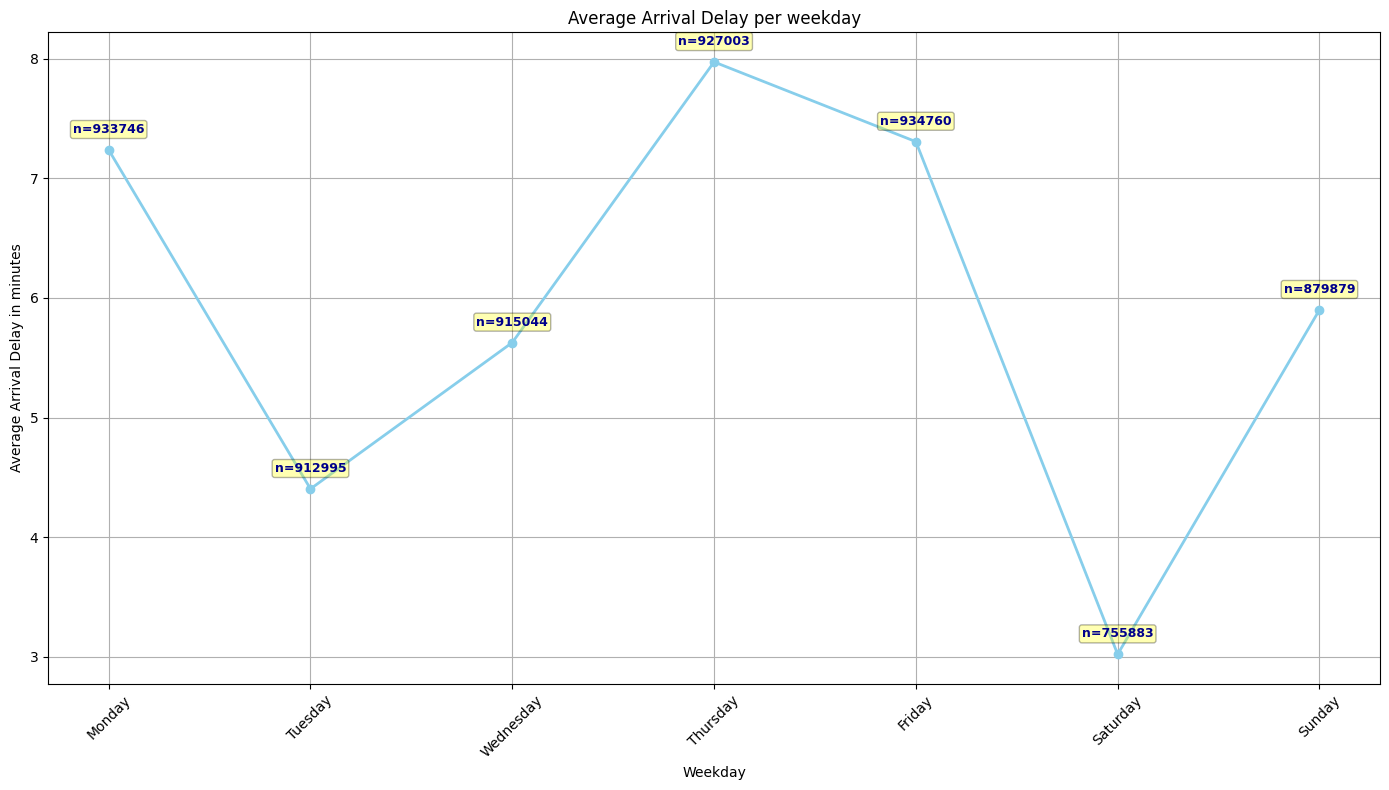

In [62]:
# Weekday mapping
week_map = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

weekday_delay = df.groupby(df['DAY_OF_WEEK'])['ARR_DELAY'].mean()

# Calculate monthly flight counts
weekday_counts = df.groupby(df['DAY_OF_WEEK']).size()

# Plot
plt.figure(figsize=(14, 8))
line = weekday_delay.plot(kind='line', marker='o', color='skyblue', linestyle='-', linewidth=2)

# Add flight counts near each point
for weekday, delay in weekday_delay.items():
    count = weekday_counts[weekday]
    plt.annotate(f'n={count}', 
                 xy=(weekday, delay), 
                 xytext=(0, 10),  # 10 points vertical offset
                 textcoords='offset points',
                 ha='center', 
                 va='bottom',
                 fontweight='bold',
                 color='darkblue',
                 fontsize=9,
                 bbox=dict(boxstyle='round,pad=0.2', 
                           fc='yellow', 
                           alpha=0.3))

plt.title('Average Arrival Delay per weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Arrival Delay in minutes')

plt.xticks(list(week_map.keys()), [week_map[key] for key in week_map], rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()

From this graph, we can see that average arrival delays follow similar trends (at weekdays) as average departure delays. However, average arrival delays are smaller than average departure delays per weekday.

### Delays by carrier

In [59]:
# Calculate average arrival delay by carrier
carrier_delays = df.groupby('OP_CARRIER')['ARR_DELAY'].mean().sort_values(ascending=False)

# Create the plot with improved styling
plt.figure(figsize=(12, 6))
carrier_delays.plot(kind='bar')
plt.title('Average Arrival Delay by Airline', fontsize=16)
plt.xlabel('Airline', fontsize=12)
plt.ylabel('Average Delay (minutes)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Optional: Add value labels on top of each bar
for i, v in enumerate(carrier_delays):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()

# Alternative with Seaborn for more styling options
plt.figure(figsize=(12, 6))
sns.barplot(x=carrier_delays.index, y=carrier_delays.values)
plt.title('Average Arrival Delay by Airline', fontsize=16)
plt.xlabel('Airline', fontsize=12)
plt.ylabel('Average Delay (minutes)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

From this graph, we can conclude that the highest delays are on Mondays, Thursdays, and Sundays. Thursdays also had the most flights (194954).